NOTE: The majority of the data cleaning, exploration and creation of new calculated fields was done on Excel.

This is a stars' data set containing information about the stars' colour, brightness, measurement angle in the sky/distance, angle error and spectral type.

The raw data of 99'999 records was collected from here: https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs
#### Note: The owner of the data mentions at some point that IV stars are dwarfs but it is wrong. IV are giants.

## Imports

In [1]:
#Importing initial libraries needed for the analysis

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Pre-processing

In [2]:
#Reading in the csv file with pandas

df = pd.read_csv('Stars_nonulls.csv')
df

,ID,Vmag,Plx,Plx_abs,e_plx,B-V,SpType,Distance (pc),abs_Vmag
0,0,9.10,3.54,3.54,1.39,0.48,F5,0.28,16.85
1,1,9.27,21.90,21.90,3.10,1.00,K3V,0.05,20.97
2,2,6.61,2.81,2.81,0.63,-0.02,B9,0.36,13.85
3,3,8.06,7.75,7.75,0.97,0.37,F0V,0.13,17.51
4,4,8.55,2.87,2.87,1.11,0.90,G8III,0.35,15.84
...,...,...,...,...,...,...,...,...,...
96702,99993,7.92,3.93,3.93,1.24,0.13,Am...,0.25,15.89
96703,99994,8.72,3.07,3.07,0.87,0.10,B3,0.33,16.16
96704,99996,8.08,1.07,1.07,0.68,1.09,G5,0.93,13.23
96705,99997,6.98,2.97,2.97,0.76,-0.14,B1.5V,0.34,14.34


Explanation of the columns:
* ID - record number
* Vmag - apparent magnitude (smaller the value - higher the magnitude), how bright the star appears
* Plx - Parallax (measured in arcseconds)
* Plx_abs - Absolute value of the parallax
* e_plx - Error in the parallax
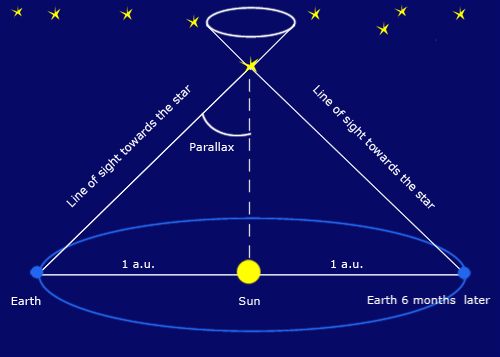
* B-V - stars' colour index ( visual wavelengths measured through V-filters are subtracted from the blue narrow wavelengths measured through B-filters)
* SpType - Spectral Type, where the letter from (blue)O-M(red) stands for the colour, arabic number denotes the temperature (hot)0-9(cool) and the roman numeral denotes the luminosity class (I-IV are giants and V-VII are dwarfs)
* Distance (pc) - Distance in parsecs which is calculated through the parallax
* abs_Vmag - absolute magnitude calculated through apparent magnitude and distance in parsecs. This is a brightness star would have if they were all put on the same relative distance, so that they could be compared.


This is called an HR-Diagram and a way to plot stars according to their luminosity class. The giants are expected at the upper side of the diagram while dwarfs are mainly at the centre and bottom of it.

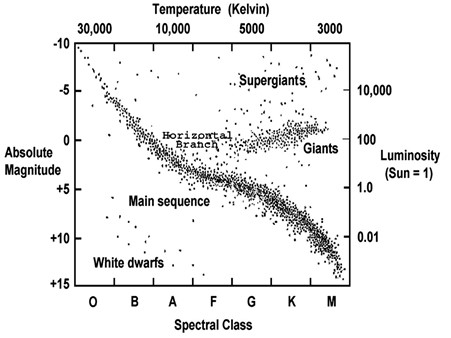

In [3]:
#Dropping the extra ID column as there is a default index field

df.drop('ID', axis=1, inplace=True)

In [4]:
df #Checking that it's gone

,Vmag,Plx,Plx_abs,e_plx,B-V,SpType,Distance (pc),abs_Vmag
0,9.10,3.54,3.54,1.39,0.48,F5,0.28,16.85
1,9.27,21.90,21.90,3.10,1.00,K3V,0.05,20.97
2,6.61,2.81,2.81,0.63,-0.02,B9,0.36,13.85
3,8.06,7.75,7.75,0.97,0.37,F0V,0.13,17.51
4,8.55,2.87,2.87,1.11,0.90,G8III,0.35,15.84
...,...,...,...,...,...,...,...,...
96702,7.92,3.93,3.93,1.24,0.13,Am...,0.25,15.89
96703,8.72,3.07,3.07,0.87,0.10,B3,0.33,16.16
96704,8.08,1.07,1.07,0.68,1.09,G5,0.93,13.23
96705,6.98,2.97,2.97,0.76,-0.14,B1.5V,0.34,14.34


In [5]:
df.describe(include='all') #Getting analytically descriptive information from the data

,Vmag,Plx,Plx_abs,e_plx,B-V,SpType,Distance (pc),abs_Vmag
count,96707.000000,96707.000000,96707.000000,96707.000000,96707.000000,96707,96707.000000,96707.000000
unique,NaN,NaN,NaN,NaN,NaN,3703,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,K0,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,7321,NaN,NaN
mean,8.291727,7.107774,7.189544,1.264157,0.701073,NaN,0.286307,16.481255
std,1.247959,11.146887,11.094322,1.156420,0.490101,NaN,3.292185,2.451071
min,-1.440000,-35.100000,0.010000,0.380000,-0.400000,NaN,-100.000000,-0.350000
25%,7.610000,2.520000,2.550000,0.870000,0.340000,NaN,0.110000,15.160000
50%,8.400000,4.600000,4.620000,1.080000,0.610000,NaN,0.200000,16.450000
75%,9.070000,8.270000,8.290000,1.360000,1.070000,NaN,0.360000,18.020000


In [6]:
df.info() #Checking that there are no nulls and the data types are correct which they are

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96707 entries, 0 to 96706
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Vmag           96707 non-null  float64
 1   Plx            96707 non-null  float64
 2   Plx_abs        96707 non-null  float64
 3   e_plx          96707 non-null  float64
 4   B-V            96707 non-null  float64
 5   SpType         96707 non-null  object 
 6   Distance (pc)  96707 non-null  float64
 7   abs_Vmag       96707 non-null  float64
dtypes: float64(7), object(1)
memory usage: 5.9+ MB


### Target Field

The goal is to do predictive analysis on the luminosity class, so whether a star is a dwarf or a giant. To extract the roman numerals from the Spectral Type feature, going to make a new target column and run a for loop through the SpType.

In [7]:
df['Target'] = df['SpType'] #Making a new feature with the Spectral type values and calling it Target
df

,Vmag,Plx,Plx_abs,e_plx,B-V,SpType,Distance (pc),abs_Vmag,Target
0,9.10,3.54,3.54,1.39,0.48,F5,0.28,16.85,F5
1,9.27,21.90,21.90,3.10,1.00,K3V,0.05,20.97,K3V
2,6.61,2.81,2.81,0.63,-0.02,B9,0.36,13.85,B9
3,8.06,7.75,7.75,0.97,0.37,F0V,0.13,17.51,F0V
4,8.55,2.87,2.87,1.11,0.90,G8III,0.35,15.84,G8III
...,...,...,...,...,...,...,...,...,...
96702,7.92,3.93,3.93,1.24,0.13,Am...,0.25,15.89,Am...
96703,8.72,3.07,3.07,0.87,0.10,B3,0.33,16.16,B3
96704,8.08,1.07,1.07,0.68,1.09,G5,0.93,13.23,G5
96705,6.98,2.97,2.97,0.76,-0.14,B1.5V,0.34,14.34,B1.5V


In [8]:
#Looping through the values in the Target field

for i in range(len(df['Target'])): #Selecting all the rows in the Target by setting the length of it to be the range
    if 'V' in df.loc[i,'Target']: #If finds 'V' in the string then checks for following:
        if 'IV' in df.loc[i,'Target']: #Check for the combination of 'IV':
            df.loc[i,'Target'] = 1 #if true and it is IV then assign giant=1
        else: #All the other combinations with 'V' are dwarfs so assigning dwarf=0 to everything else
            df.loc[i,'Target'] = 0 #dwarf
    elif 'I' in df.loc[i,'Target']: #If it finds 'I' after having looked for all the 'V's then look for following combinations
        if 'II' in df.loc[i,'Target']: #If true label giant=1
            df.loc[i,'Target'] = 1 #giant
        elif 'III' in  df.loc[i,'Target']: #If true label giant=1
            df.loc[i,'Target'] = 1 #giant
        else: #All the other ones left with I in it are giants as well
            df.loc[i,'Target'] = 1 #giant
    else: #If all the cases are exhausted, label it 2 as other type of star if no roman numbers
        df.loc[i,'Target'] = 2 #other
        
df['Target'] #Checking that all the values had been labelled

0        2
1        0
2        2
3        0
4        1
        ..
96702    2
96703    2
96704    2
96705    0
96706    1
Name: Target, Length: 96707, dtype: object

Some of the string values had two roman numerals in it, sometimes inbetween the giant and dwarf class ("IV/V" - in this case loop labelled it to be a giant). The unclear labelling might cause the stars to be in the the sections of the HR-diagram where they are not expected according to their parameters.

### Balancing data

C:\Users\HelenLuhaar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

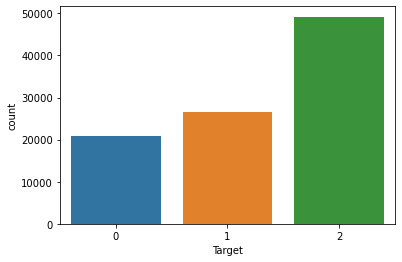

In [15]:
sns.countplot(df['Target']) #Counting how many different types of stars there are

As majority of the records are for the other type of star than dwarf or a giant then dropping them

In [16]:
df_balance = df.drop(df[df['Target'] == 2].index) #Dropping all the rows with the 2 in the Target field permanently

In [17]:
df_balance #Checking the data frame again to see the changes

,Vmag,Plx,Plx_abs,e_plx,B-V,SpType,Distance (pc),abs_Vmag,Target
1,9.27,21.90,21.90,3.10,1.00,K3V,0.05,20.97,0
3,8.06,7.75,7.75,0.97,0.37,F0V,0.13,17.51,0
4,8.55,2.87,2.87,1.11,0.90,G8III,0.35,15.84,1
5,12.31,18.80,18.80,4.99,1.34,M0V:,0.05,23.68,0
9,8.59,10.76,10.76,1.10,0.49,F6V,0.09,18.75,0
...,...,...,...,...,...,...,...,...,...
96696,8.79,0.89,0.89,1.28,1.19,K1III,1.12,13.54,1
96698,8.00,0.41,0.41,0.92,0.85,F6Iab,2.44,11.06,1
96701,7.69,6.60,6.60,0.92,1.11,K2III,0.15,16.79,1
96705,6.98,2.97,2.97,0.76,-0.14,B1.5V,0.34,14.34,0


C:\Users\HelenLuhaar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

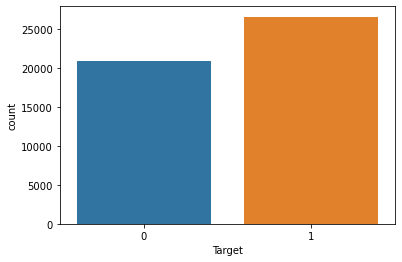

In [18]:
sns.countplot(df_balance['Target']) #The category 2 is gone as needed

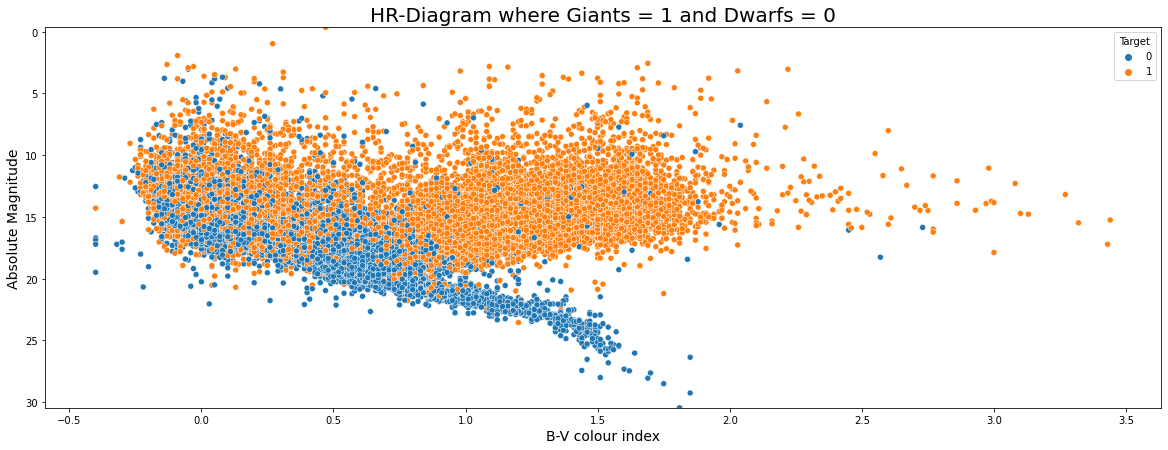

In [22]:
plt.figure(figsize=(20,7)) #Setting the figure size

yy = df_balance['abs_Vmag'] #getting the y axis to flip it in the end as negatives are higher magnitude

hr_scatter = sns.scatterplot(data=df_balance, hue='Target', x='B-V', y='abs_Vmag') #making a scatter graph of the giants and dwarfs

plt.ylim(yy.max(), yy.min()) #flipping the y axis
#Setting the titles
plt.xlabel('B-V colour index', fontsize=14)
plt.ylabel('Absolute Magnitude', fontsize=14)
plt.title('HR-Diagram where Giants = 1 and Dwarfs = 0', fontsize=20);

As expected, there are some dwarfs in the giants' area and some giants in the dwarfs' area due to the unclear labelling which I described before. However, they are a minority and machine learning (ML) can still be done. This means that the ML might evaluate correctly but it has been the human error (unclear labelling) which has selected the wrong category. Future work could include building a model on more specific classes like white dwarfs and red giants, and include a better selection. Currently, sticking with just dwarfs and giants. The source could have its own reason for labelling like that (there was no info on this), so trusting the current information and looking into it in the future when there is more time.

Downsampling the dwarfs as there are so many entries that can afford to lose some. They need to be brought down to the same level, otherwise, there will be bias in the model. The model favouring some values to others because they are drastically different.

In [23]:
df_balance = df_balance.reset_index(drop=True) #resetting the index values as they were all messed up due to dropping of data

In [24]:
# Separating the target classes in the target field

df_giants = df_balance[df_balance.Target == 1]
df_dwarfs = df_balance[df_balance.Target == 0]

In [25]:
#Naming a new variable and undersampling

df_sampled = df_giants.sample(n=len(df_dwarfs), random_state=101) #taking the random sample length of the dwarfs to be the length of the giants
df_balance = pd.concat([df_dwarfs,df_sampled],axis=0) #Combining the giants and and sampled dwarfs into one data frame

In [26]:
df_balance['Target'].value_counts() #counting the values in the target column to see that the sampling worked

0    20875
1    20875
Name: Target, dtype: int64

C:\Users\HelenLuhaar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

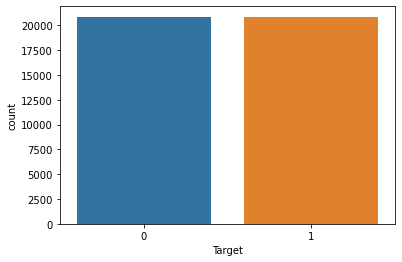

In [27]:
sns.countplot(df_balance['Target']) #Plotting the result of the sampling as well

In [28]:
df_balance #Looking at the data again

,Vmag,Plx,Plx_abs,e_plx,B-V,SpType,Distance (pc),abs_Vmag,Target
0,9.27,21.90,21.90,3.10,1.00,K3V,0.05,20.97,0
1,8.06,7.75,7.75,0.97,0.37,F0V,0.13,17.51,0
3,12.31,18.80,18.80,4.99,1.34,M0V:,0.05,23.68,0
4,8.59,10.76,10.76,1.10,0.49,F6V,0.09,18.75,0
7,8.15,6.15,6.15,1.00,0.43,F3V,0.16,17.09,0
...,...,...,...,...,...,...,...,...,...
9106,8.08,3.29,3.29,0.66,1.35,K2III,0.30,15.67,1
18170,8.76,1.17,1.17,2.15,1.12,K0/K1III,0.85,14.10,1
35867,8.78,3.06,3.06,1.36,1.14,K0II/III,0.33,16.21,1
21965,5.96,9.67,9.67,0.68,1.12,K2III,0.10,15.89,1


All the values in the Target column are 1's consecutively and so are 0's so need to mix them up to avoid bias. Also, the index needs to be reset again because of the combination of two data frames

In [29]:
#Shuffling the data and resetting the index

df_processed = df_balance.sample(frac=1).reset_index(drop=True)

df_processed

,Vmag,Plx,Plx_abs,e_plx,B-V,SpType,Distance (pc),abs_Vmag,Target
0,9.69,5.71,5.71,1.24,0.46,F2V,0.18,18.47,0
1,8.54,1.90,1.90,0.78,1.09,K0III,0.53,14.93,1
2,8.33,3.32,3.32,1.30,0.96,G8III/IV,0.30,15.94,1
3,8.35,7.48,7.48,1.20,0.57,F5V,0.13,17.72,0
4,7.87,3.85,3.85,0.68,0.15,A3V,0.26,15.80,0
...,...,...,...,...,...,...,...,...,...
41745,9.27,28.70,28.70,1.29,1.00,K3V,0.03,21.56,0
41746,6.21,5.68,5.68,0.85,1.28,K2IIIvar,0.18,14.98,1
41747,9.06,8.11,8.11,1.16,0.47,F3V,0.12,18.61,0
41748,8.74,2.98,2.98,1.10,1.19,K0III,0.34,16.11,1


In [21]:
#Saving a new file with all the cleaned data

df_processed.to_csv("Star_processed.csv", index=False)

In [22]:
#Saving a new file with all the cleaned data and with the third class, no data preprocessing. For the Power BI

df.to_csv("Star_clean.csv", index=False)

NOTE: The ML continues in the other Jupyter Notebook file "Final_Project_Predictive_Analysis_of_Classification_of_Stars - Helen"